# Cifar-100
### 모델 출처: [Divya Agarwal](https://github.com/divya025/Cifar100)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 로드

In [3]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [5]:
CIFAR100_LABELS = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

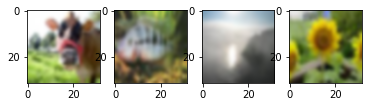

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [7]:
CIFAR100_LABELS[y_train[0][0]], CIFAR100_LABELS[y_train[4][0]], \
    CIFAR100_LABELS[y_train[8][0]], CIFAR100_LABELS[y_train[12][0]]

('cattle', 'aquarium_fish', 'cloud', 'sunflower')

### 데이터 전처리

In [8]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [9]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, 100)
Y_test = to_categorical(y_test, 100)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 모델 정의/설정/학습

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                 input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
modelpath = "model/cifar100-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

In [13]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50, 
                    validation_split=0.2, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
800/800 [==============================] - 6s 5ms/step - loss: 4.5196 - accuracy: 0.0211 - val_loss: 4.0712 - val_accuracy: 0.0959

Epoch 00001: val_loss improved from inf to 4.07125, saving model to model/cifar100-cnn-01-4.0712.hdf5
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 4.0618 - accuracy: 0.0786 - val_loss: 3.7113 - val_accuracy: 0.1530

Epoch 00002: val_loss improved from 4.07125 to 3.71129, saving model to model/cifar100-cnn-02-3.7113.hdf5
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 3.7818 - accuracy: 0.1205 - val_loss: 3.5291 - val_accuracy: 0.1818

Epoch 00003: val_loss improved from 3.71129 to 3.52912, saving model to model/cifar100-cnn-03-3.5291.hdf5
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 3.6171 - accuracy: 0.1477 - val_loss: 3.3853 - val_accuracy: 0.2062

Epoch 00004: val_loss improved from 3.52912 to 3.38529, saving model to model/cifar100-cnn-04-3.3853.hdf5
Epoc

In [14]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/cifar100-cnn-79-2.1401.hdf5')

In [15]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"\n Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 2.1499 - accuracy: 0.4659

 Test Accuracy: 0.4659


### 훈련과정 시각화

In [16]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

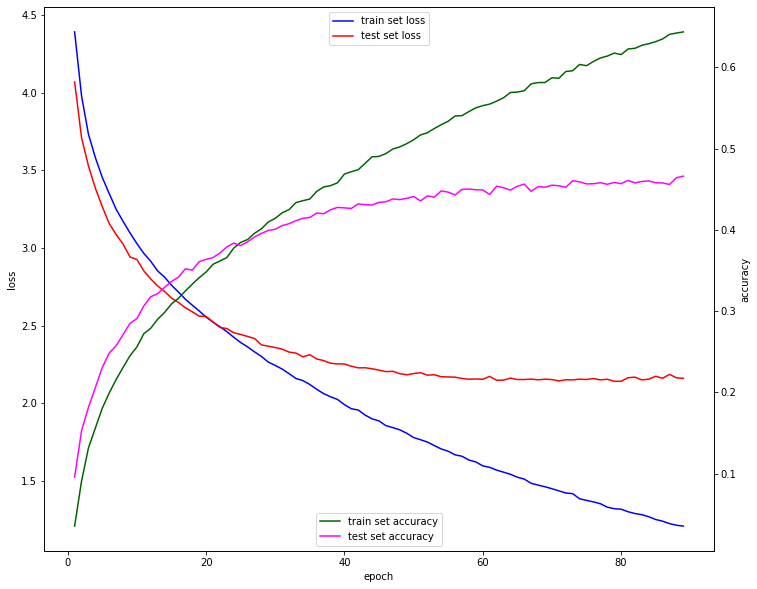

In [18]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,10))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='train set loss')
ax0.plot(x_len, y_vloss, c="red", label='test set loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='train set accuracy')
ax1.plot(x_len, y_vacc, c="magenta", label='test set accuracy')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()